# 메모

* k개 랜선에서 각각 잘라야함 (두 개 랜선을 붙일 수 없음)

* 이때 각각 자른것들의 개수의 합이 N이 되어야함
  - 그리고 N개는 전부 길이가 동일해야 함
  
* 자를 때 정수로만 잘라야. (203.11이런게 남으면 안됨)

* 일단 sort하고,

* 주어진 랜선 중 가장 작은값을 기준으로 뭔가 하면 될거같은데
  - 랜선 중 가장 작은값 하나 잡아서 A라고 할 때,
  - while돌리면서 A의 중간값을 target으로 설정 -> 이 target으로 다른 랜선들 잘라보고
  - if num < k 이면 나와서 A의 중간값의 중간값을 다시 target으로 설정 -> 반복
  
  - 이때 **int(pivot계산한거) = target** 으로 해야함!!(정수!!)
  
  - min으로 다른 랜선들을 자른값(나눠기의 몫값 = 개수니까) 얘를 ans += 해주면 되지 않을까
  - 그래서 ans < N이면 다시 돌리고, == 면 끝?
  
* 이진탐색은 어케되는겨

---

* 이진탐색 쓰는 이유 (중요)
  - 내가 생각한 방식에서, 랜선 중 가장 작은 애를 기준으로 자르면
  - -1씩 해가면서 브루트폴스 하면서 길이를 재봤어야함!
  
  - 그러나 이진탐색 수행하면, -1씩 안하고 큼직큼직 절반씩 잘라나가서
  - 시간과 연산량을 매우 매우 단축시킬 수 있음!

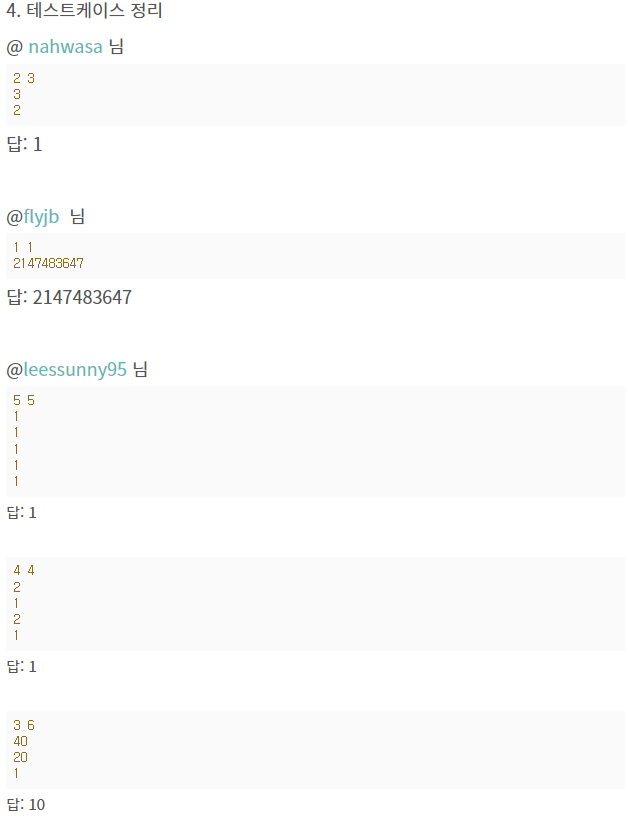

In [27]:
''' 내가푼 - 문제에서 테케는 맞췄는데, 추가 테케를 고쳐봐야함 '''
def make_target(start,end):
    return (start+end) // 2

k, n = map(int,input().split())
#arr = [int(input()) for i in range(k)]
arr = [802, 743, 457, 539]
#arr = [2,1,2,1]

start = 1
end = min_num
num_of_rans = 0

min_num = min(arr)

if min_num == 1: target = 1
else: target = make_target(start,end)

while 1:
    for card in arr:
        num_of_rans = num_of_rans + int(card // target)

    # 개수가 부족 = target(pivot)을 더 줄여서 개수를 늘려줘야함
    if num_of_rans < n:
        print(target,num_of_rans)
        end = target-1        
        target = make_target(start,end)
        
    # 개수가 많다 = target(pivot)을 키워서 개수 줄여야함
    elif num_of_rans > n:
        print(target,num_of_rans)
        start = target+1        
        target = make_target(start, end)

    # 찾았다!
    else:
        break
        
    num_of_rans = 0   # 초기화는 필수
    print("------------------------------")
    
print(target,num_of_rans)

4 11
229 9
------------------------------
114 21
------------------------------
171 13
------------------------------
200 11


In [45]:
''' 내가푼 - 추가테케 고려한 풀이 '''
def make_target(start,end):
    return (start+end) // 2

def bin_search(target, start, end):
    num_of_rans = 0
    while 1:
        for card in arr:
            num_of_rans = num_of_rans + int(card // target)

        # 개수가 부족 = target(pivot)을 더 줄여서 개수를 늘려줘야함
        if num_of_rans < n:
            print(target,num_of_rans)
            tmp = target
            end = target-1        
            target = make_target(start,end)
            if tmp == target:
                print(target)
                break

        # 개수가 많다 = target(pivot)을 키워서 개수 줄여야함
        elif num_of_rans > n:
            print(target,num_of_rans)
            tmp = target
            start = target+1        
            target = make_target(start, end)
            if tmp == target:
                print(target)
                break

        # 찾았다!
        else:
            print(target)
            break

        num_of_rans = 0   # 초기화는 필수
        print("------------------------------")
    
k, n = map(int,input().split())
arr = [int(input()) for i in range(k)]

min_num = min(arr)
start = 1
end = min_num

if min_num == 1: 
    print(1)           # 가장 작은게 1이면 그 이상의 길이로는 자를 수 없음
elif k == 1:          # 랜선이 하나뿐이면 자를 수 있는 최소길이=최대길이
    print(arr[0])
else: 
    target = make_target(start,end)
    bin_search(target, start, end)


2 3
3
2
1 5
------------------------------
2 2
------------------------------
1 5
1


In [56]:
''' 내가푼 - 제출답안 - 근데 틀렸대,, '''
def make_target(start,end):
    return (start+end) // 2

def bin_search(target, start, end):
    num_of_rans = 0
    while 1:
        for card in arr:
            num_of_rans = num_of_rans + int(card // target)

        # 개수가 부족 = target(pivot)을 더 줄여서 개수를 늘려줘야함
        if num_of_rans < n:
            tmp = target
            end = target-1        
            target = make_target(start,end)
            if tmp == target:
                print(target)
                break

        # 개수가 많다 = target(pivot)을 키워서 개수 줄여야함
        elif num_of_rans > n:
            tmp = target
            start = target+1        
            target = make_target(start, end)
            if tmp == target:
                print(target)
                break

        # 찾았다!
        else:
            print(target)
            break

        num_of_rans = 0   # 초기화는 필수
    
k, n = map(int,input().split())
arr = [int(input()) for i in range(k)]

min_num = min(arr)
start = 1
end = min_num

if min_num == 1: 
    print(1)           # 가장 작은게 1이면 그 이상의 길이로는 자를 수 없음
elif k == 1:          # 랜선이 하나뿐이면 자를 수 있는 최소길이=최대길이
    print(arr[0])
else: 
    target = make_target(start,end)
    bin_search(target, start, end)


3 6
40
20
10
10


In [18]:
''' 다시 '''
k, n = map(int,input().split())
arr = [int(input()) for i in range(k)]

start, end = 1, min(arr)

while start <= end:
    pivot = (start+end)//2
    
    num_of_rans = 0
    
    for ran in arr:
        num_of_rans = num_of_rans + int(ran//pivot)
        
    if num_of_rans < n:
        end = pivot - 1
    
    elif n <= num_of_rans:
        start = pivot +1
        
print(end)
    
    
    

1 1
2147483647


In [ ]:
#arr = [802, 743, 457, 539]
#arr = [2,1,2,1]
#arr = [2147483647]
#arr = [40,20,10]
#arr = [3,2]


In [32]:

k, n = map(int,input().split())
arr = list(map(int,input().split()))

# 놓친거 3. max()를 end로 둬야한다. <----이거때문에 계속 틀림
start, end = 1, max(arr)

while start <= end:
    num_of_rans = 0              # 여기 넣어주면 자동 초기화

    target = (start+end) // 2    # 함수 만들 필요 없다. 그냥 베이직 코드로!
    
    # Main Idea - 랜선별로 각각 계산 후 add
    for card in arr:
        num_of_rans = num_of_rans + int(card // target)

    # 개수가 부족 = target(pivot)을 더 줄여서 개수를 늘려줘야함
    if num_of_rans < n:
        end = target-1
        
    # 개수가 많다 = target(pivot)을 키워서 개수 줄여야함
    # 놓친거 1. 일단 같거나 많으면, 조정도 해줘야함
    elif n <= num_of_rans:
        start = target+1

# 놓친거 2. pivot을 출력하게되면, start가 될수도, end가 될수도 있음 (while문 종료조건)
#    -> 따라서 가장 큰 값을 출력하는 것이므로 end를 도출해야 함
print(target)

4 7
20 15 10 17
2147483647
